# Decision Tree

Uma árvore de decisão é uma ferramenta de suporte à decisão que usa um modelo de decisão semelhante a uma árvore e suas possíveis consequências, incluindo resultados de eventos possíveis, custos de recursos e utilidade. 

É uma maneira de exibir um algoritmo que contém apenas instruções de controle condicional.

Árvores de decisão são comumente usadas em pesquisa operacional, especificamente na análise de decisão, para ajudar a identificar uma estratégia com maior probabilidade de atingir uma meta, mas também são uma ferramenta popular no Machine Learning.

Para mais detalhes: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)

Primeiramente importamos as bibliotecas iniciais que vamos trabalhar.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Dados

Começaremos carregando os nossos dados referentes a diferentes características de pinguins.

Para mais detalhes sobre este dataset, visite sua página **[palmerpenguins](https://allisonhorst.github.io/palmerpenguins/)**

In [3]:
df = pd.read_csv('dados/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Podemos ver quais espécies únicas de pinguins temos em nosso conjunto de dados.

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Estas são as espécies que desejamos prever baseado nas **features** que temos disponíveis.

Vejamos agora quantos dados faltantes nós temos.

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Com o método **info()** podemos obter mais informações, como o número de entradas no dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Vamos então eliminar todos os dados faltantes com **dropna()**, já que eles não são uma quantidade tão impactante.

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


Agora vamos explorar as **features** categóricas.

In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Como podemos ver, temos um pinguim com o sexo indefinido.

Vejamos se podemos inferir a qual sexo ele pertence.

In [14]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

Aparentemente este pinguim é fêmea, vamos então preencher ele com a informação que inferimos.

In [15]:
df.at[336,'sex'] = 'FEMALE'

In [16]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm       217
body_mass_g            4875
sex                  FEMALE
Name: 336, dtype: object

Vamos agora visualizar os nossos dados para ver quão separadas estão as classes.

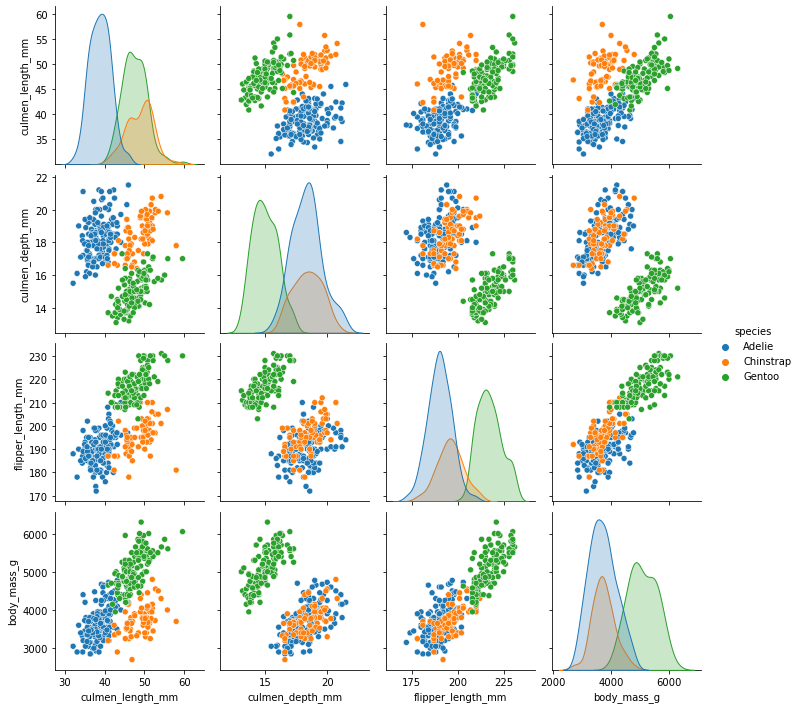

In [17]:
sns.pairplot(df, hue='species');

Podemos também usar um **boxplot** para comparar diferentes **features**.

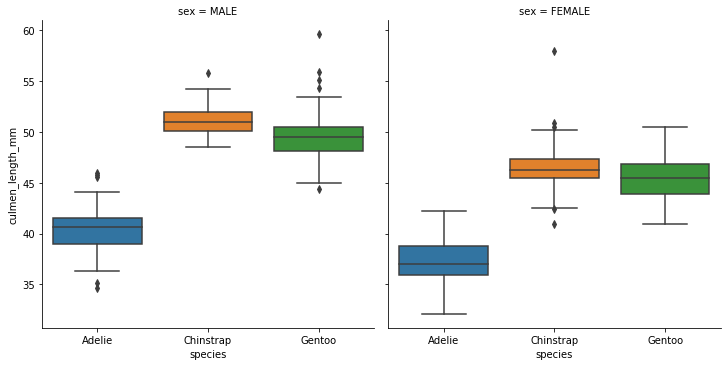

In [19]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex');

## Machine Learning

Devemos preparar os nossos dados para o algoritmo de Decision Tree.

Por isso precisamos codificar os **features** categóricos para poder alimentar o algoritmo, que espera dados apenas numéricos.

Além disso, vamos separar os dados em **features** (X) e **labels** (y).

In [20]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [21]:
y = df['species']

E então podemos realizar o **train_test_split**.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

E agora podemos instanciar o nosso modelo.

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

Ajustamos os dados ao nosso modelo definido.

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Faremos as primeiras previsões do nosso modelo base.

In [25]:
base_preds = model.predict(X_test)

In [26]:
base_preds[:10]

array(['Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie'], dtype=object)

In [27]:
y_test[:10]

66        Adelie
91        Adelie
278       Gentoo
331       Gentoo
207    Chinstrap
112       Adelie
239       Gentoo
158    Chinstrap
29        Adelie
100       Adelie
Name: species, dtype: object

Medimos o desempenho do nosso modelo com diferentes métricas.

In [28]:
from sklearn.metrics import classification_report, plot_confusion_matrix

**Classification Report**

In [29]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        52
   Chinstrap       0.95      0.95      0.95        21
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



**Matriz de Confusão**

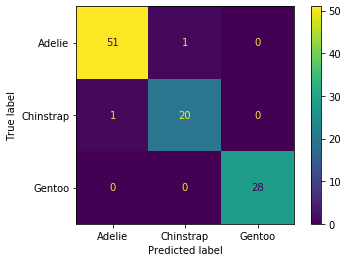

In [31]:
plot_confusion_matrix(model, X_test, y_test);

Aparentemente nosso modelo está apresentando uma perfomance excelente.

Um atributo importante que podemos acessar é a importância de cada **feature** de nossos dados na contribuição do desempenho do modelo.

In [32]:
model.feature_importances_

array([0.33588015, 0.06180942, 0.53764325, 0.01674813, 0.03787017,
       0.01004888, 0.        ])

Veja que eles estão representados na mesma ordem de nossas colunas.

In [33]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

Vamos então formatá-los em um **DataFrame** para melhor visualização.

In [35]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
sex_MALE,0.000000
island_Torgersen,0.010049
body_mass_g,0.016748
island_Dream,0.037870
culmen_depth_mm,0.061809
culmen_length_mm,0.335880
flipper_length_mm,0.537643


Para melhor compreender as decisões de nosso modelo, podemos plotar a árvore de decisão através da função **plot_tree** do Scikit-Learn.

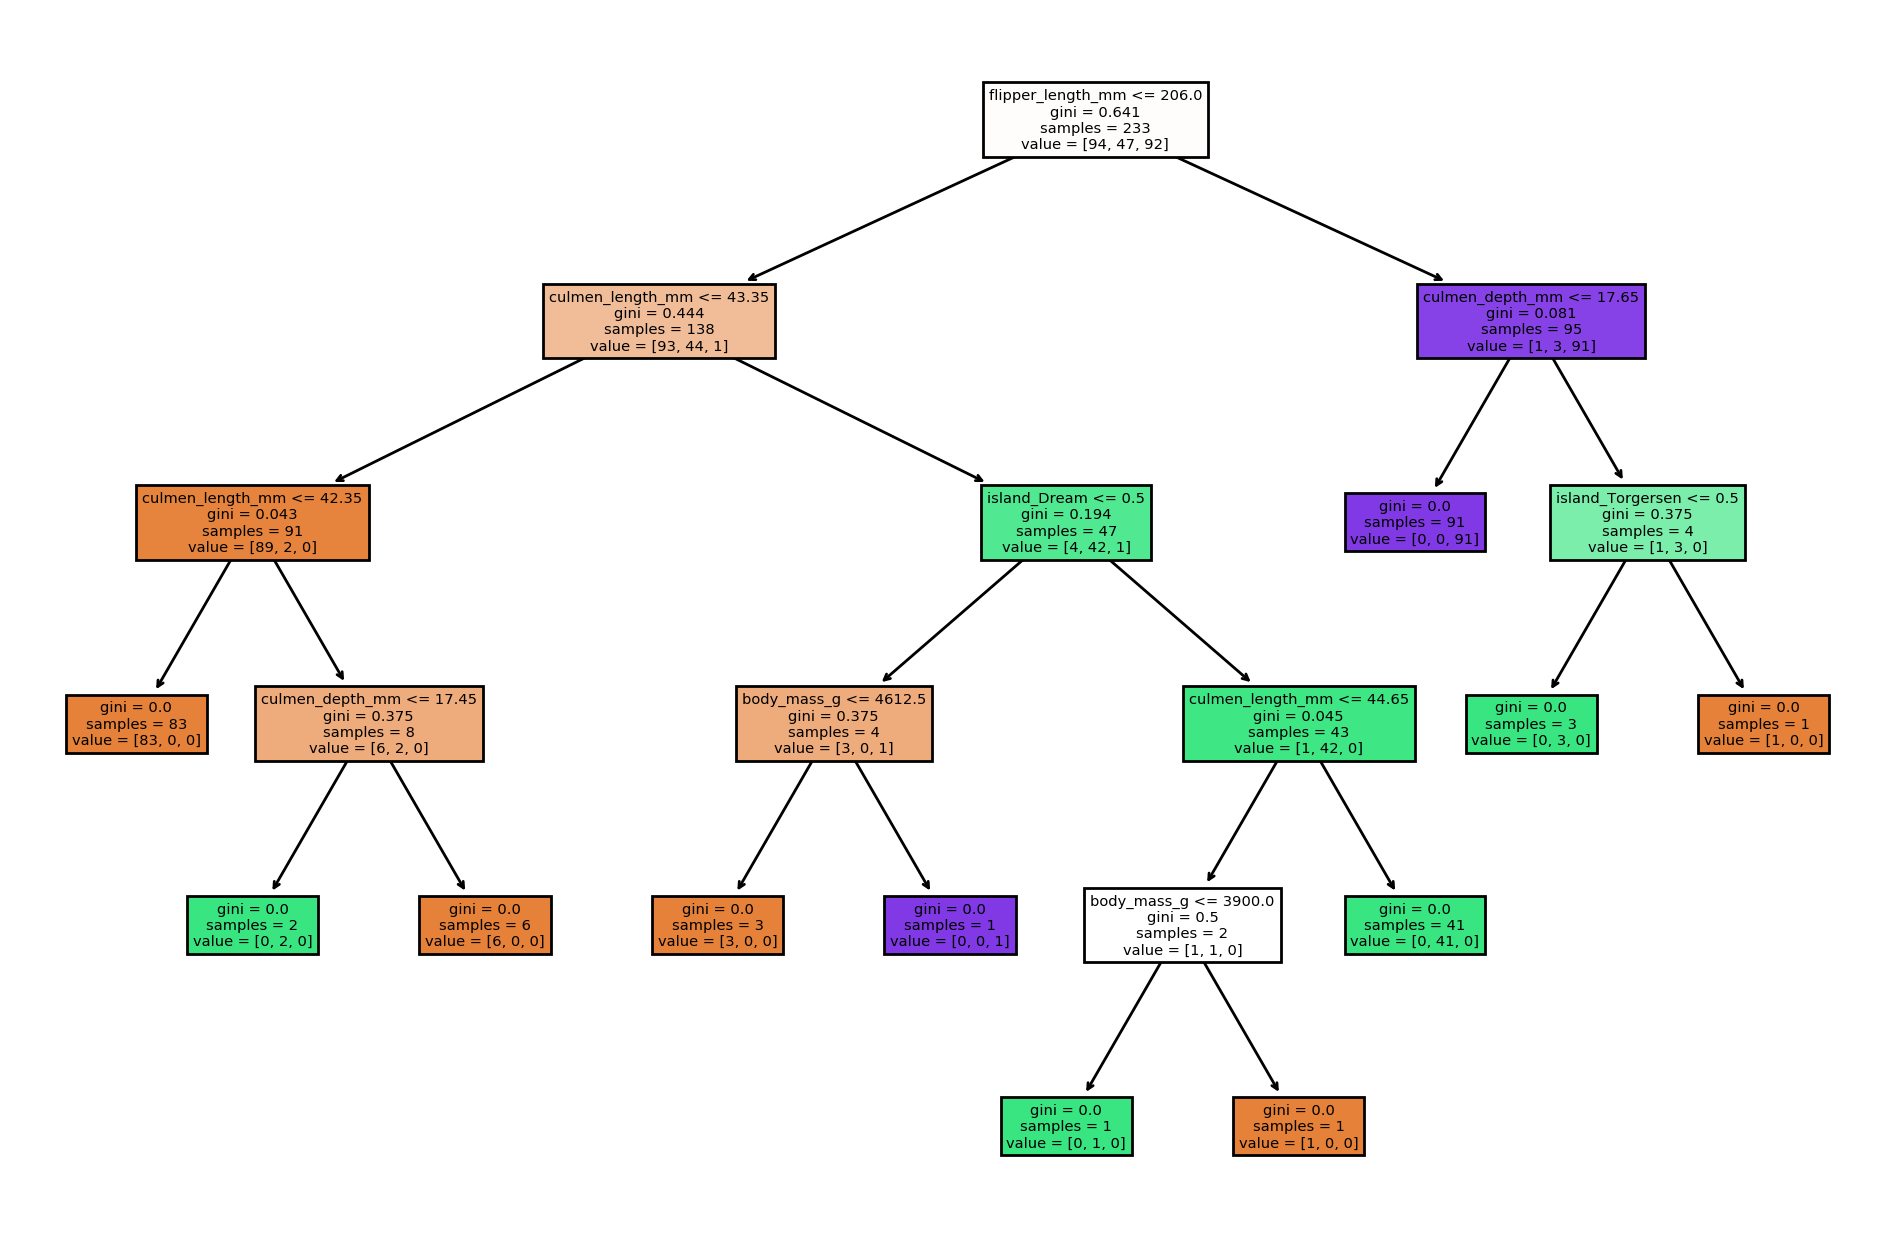

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

Para o **root node** temos por exemplo que `samples = 233`, isso se dá ao fato de que 233 dados entrarão neste node de decisão.

In [43]:
len(X_train)

233

Quando `gini = 0` significa que os dados são puros e então temos uma classificação.

Vamos agora definir uma função que irá reportar o desempenho de um modelo tree, assim como apresentar o desenho dela.

In [44]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

Testaremos um novo modelo com uma árvore podada e analisaremos o seu desempenho.

In [45]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

Ajustamos os dados.

In [46]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

E reportamos o modelo.

              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96        52
   Chinstrap       0.95      0.86      0.90        21
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101





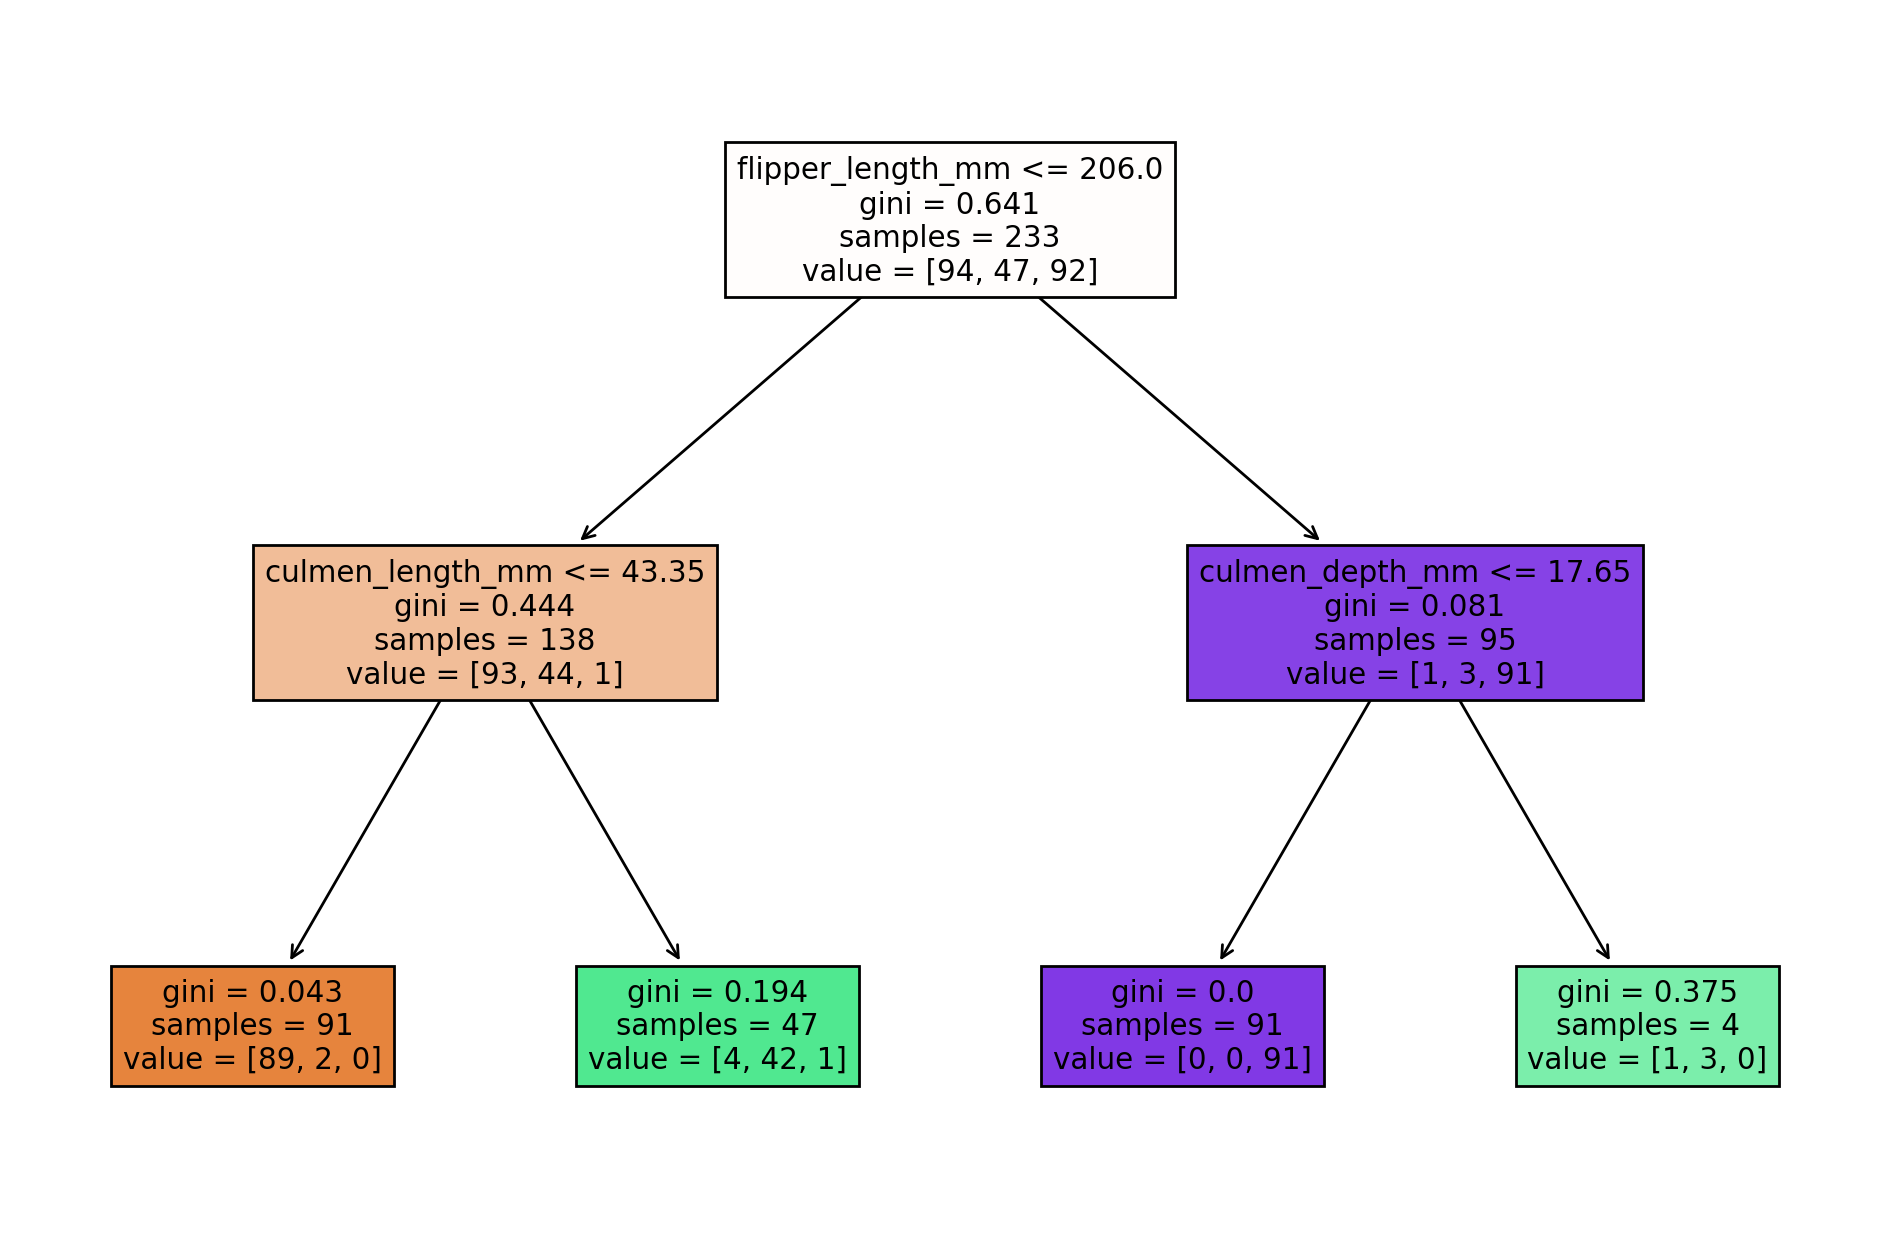

In [47]:
report_model(pruned_tree)

Observe que este modelo tem um desempenho inferior, mas a árvore agora está menor, uma vez que alteramos o hiperparâmetro **max_depth**.

Vamos agora definir uma nova árvore alterando o hiperparâmetros **max_leaf_nodes**.

In [48]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

Novamente ajustamos os dados.

In [49]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

E reportamos o seu desempenho o gráfico.

              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96        52
   Chinstrap       1.00      0.76      0.86        21
      Gentoo       0.90      1.00      0.95        28

    accuracy                           0.94       101
   macro avg       0.95      0.91      0.93       101
weighted avg       0.94      0.94      0.94       101





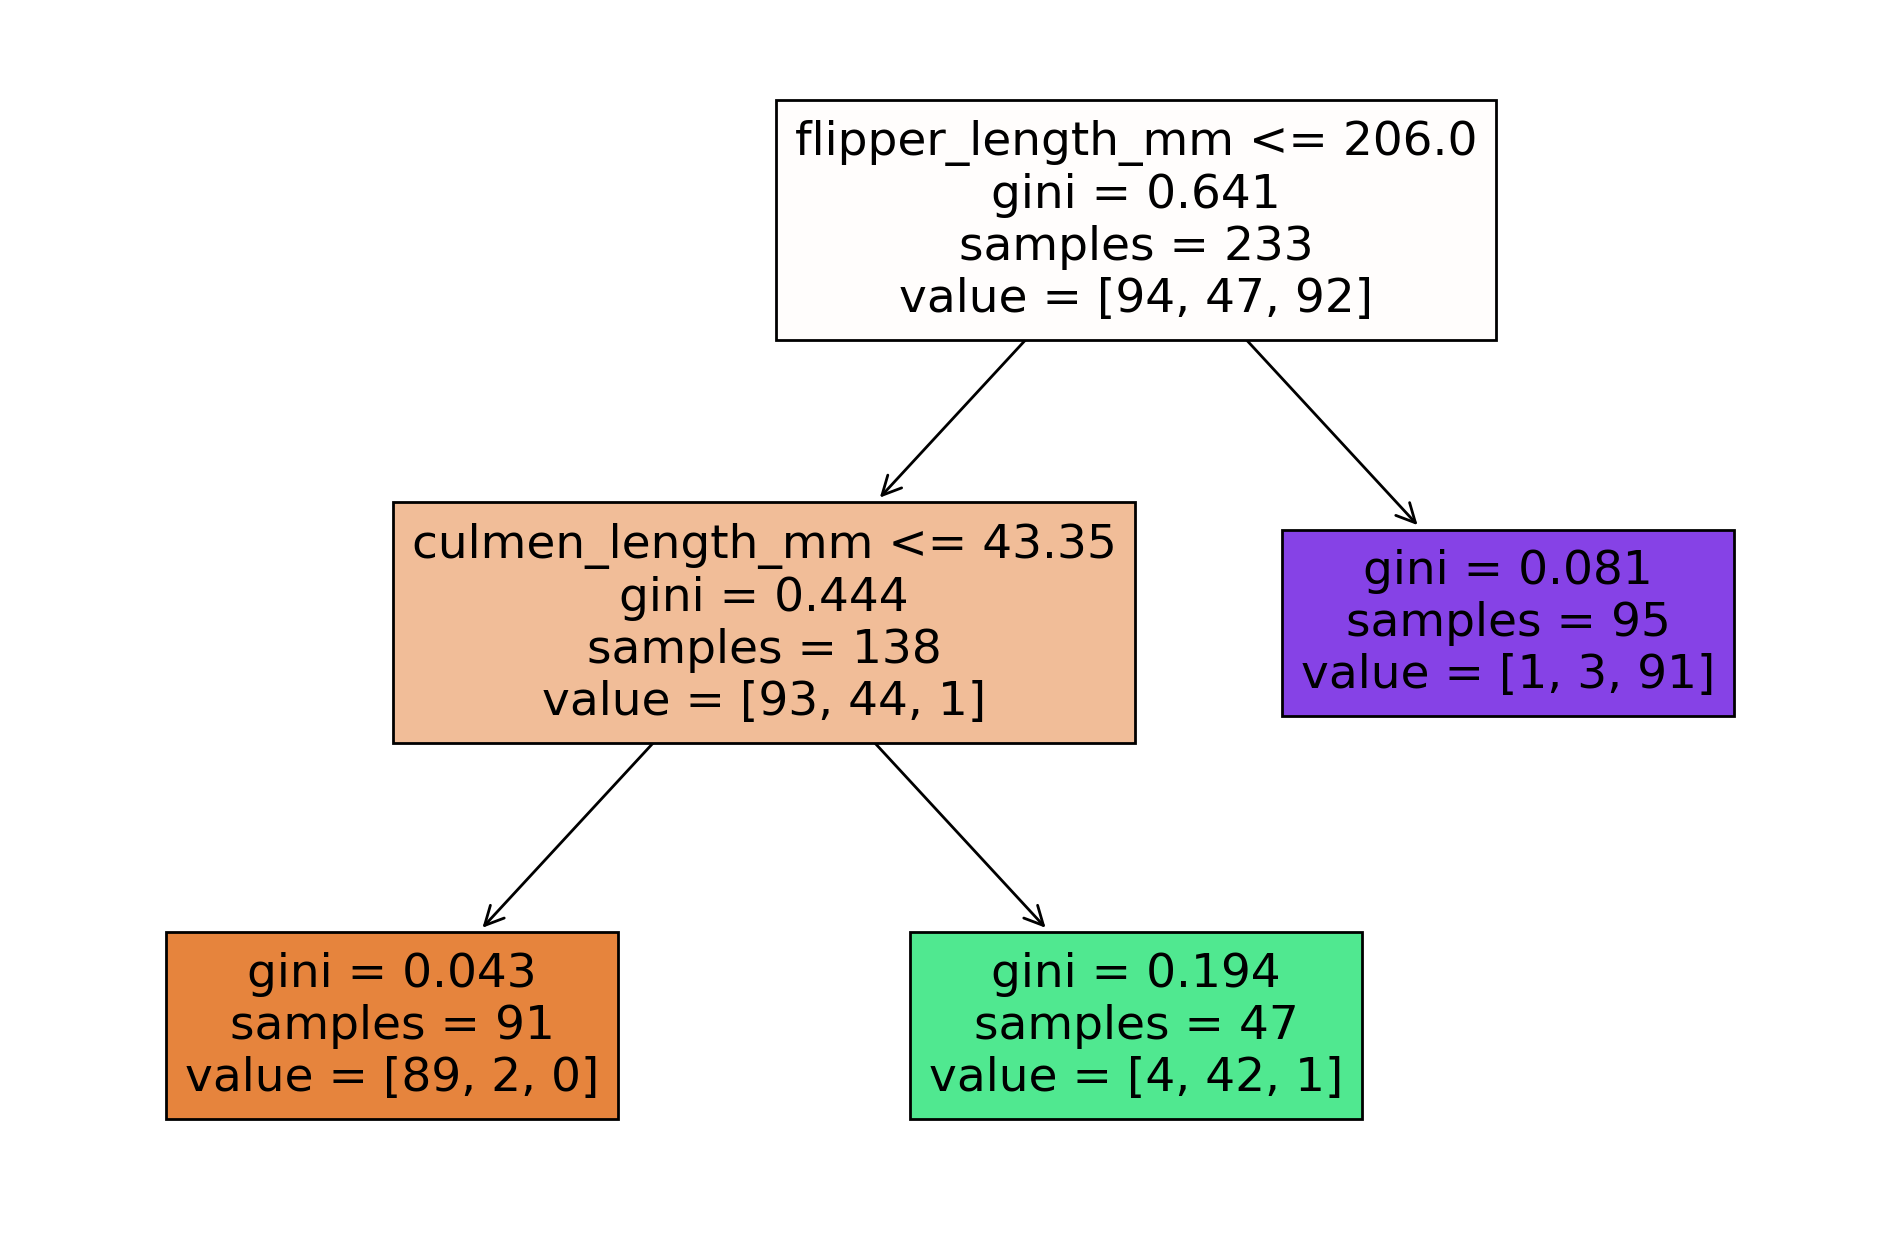

In [50]:
report_model(max_leaf_tree)

Perceba que este modelo pode ter no máximo 3 nodes folhas, ilustrados na imagem acima.

Agora iremos alterar o hiperparâmetro **criterion** para *entropy*.

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        52
   Chinstrap       0.95      0.95      0.95        21
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





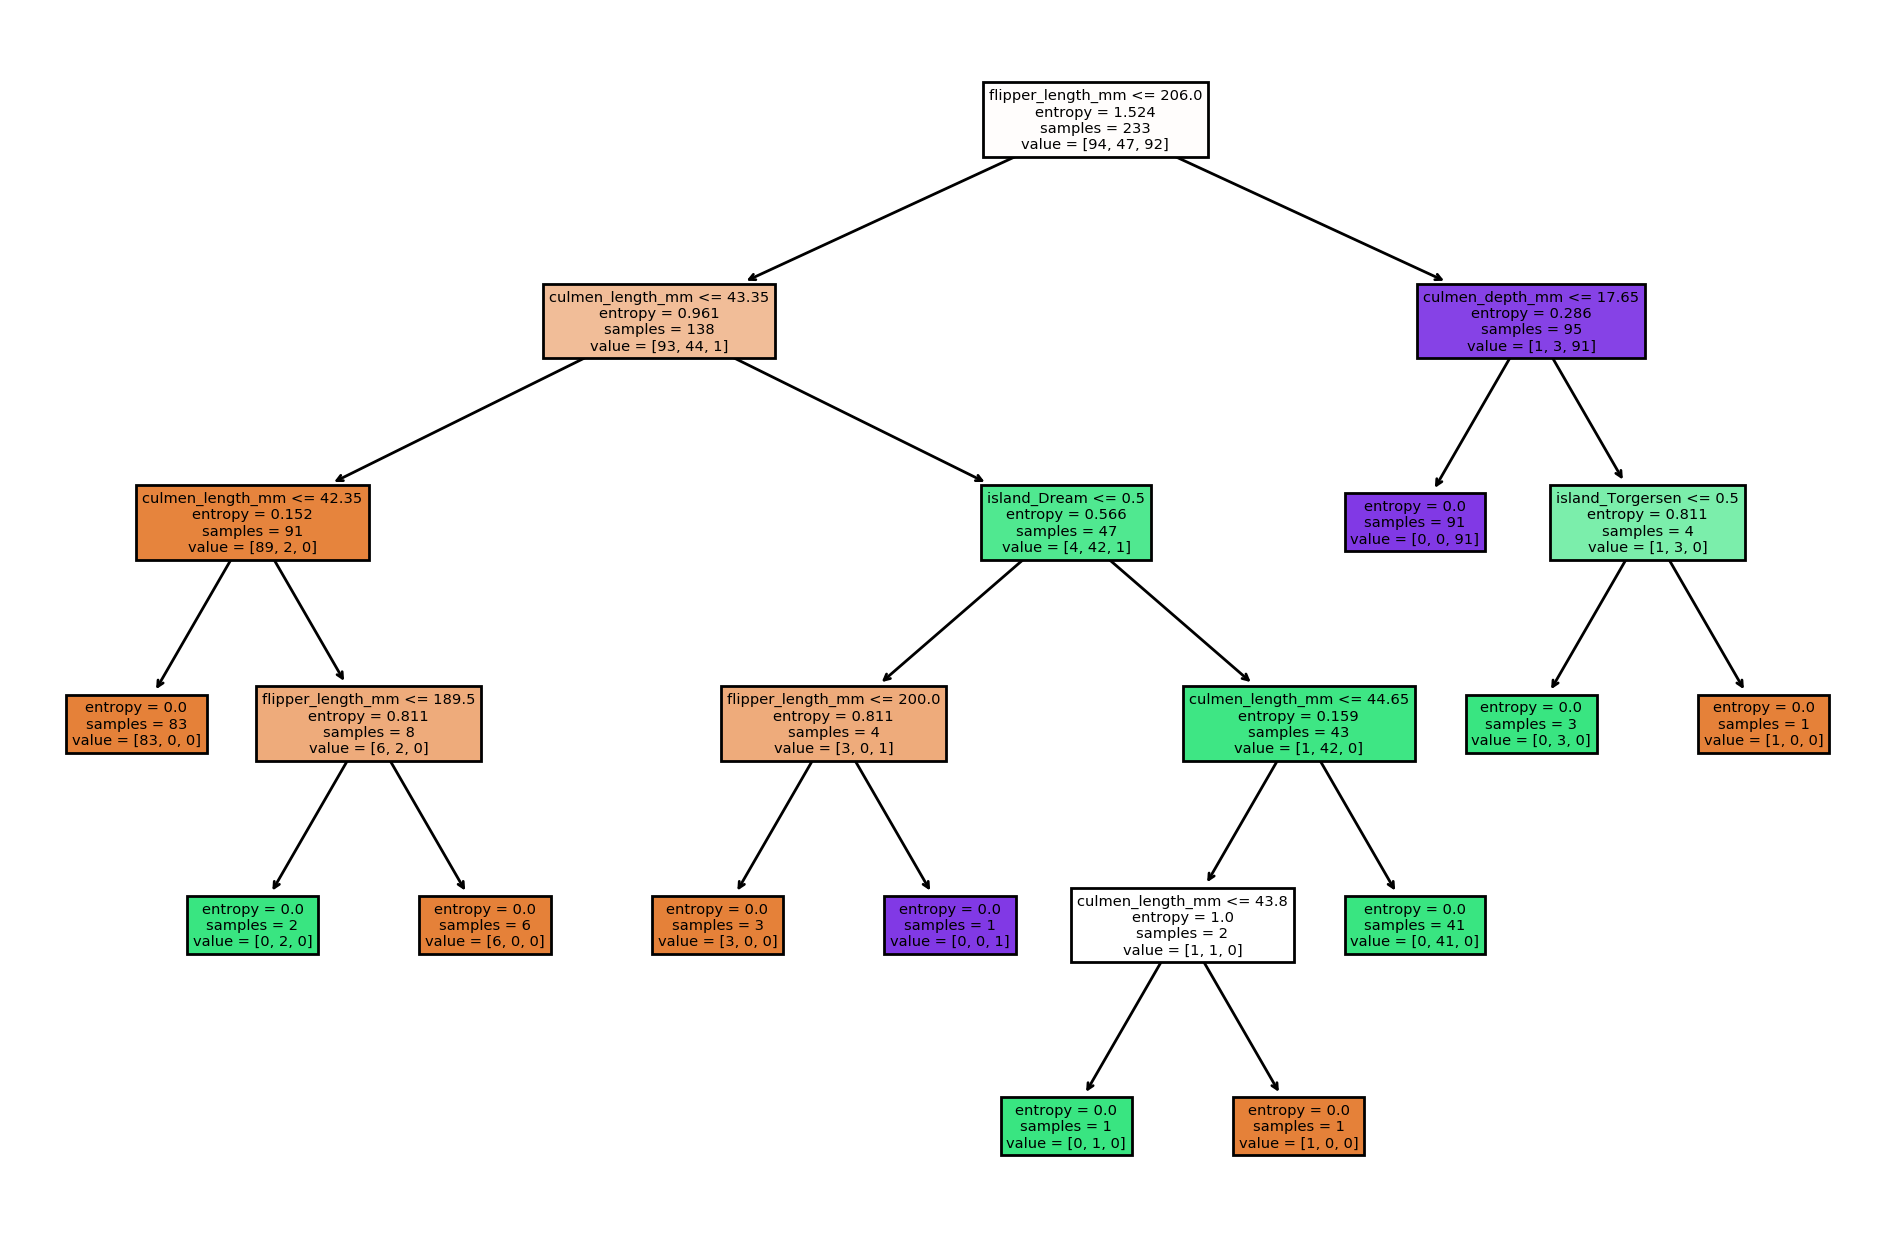

In [51]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)
report_model(entropy_tree)

Esse método considera uma equação matemática diferente na divisão dos dados na árvore de decisão, afetando assim o desempenho do nosso algoritmo e o formato da árvore.